# Extração Automática de Dados - Pós-graduação Agentes e Sistemas Inteligentes - UFG

*Nome: Valério Viégas Wittler - valeriow@gmail.com*

## Análise dos dados extraídos do JustWatch e do Google Notícias

O projeto já contém dados extraídos do JustWatch e do Google Notícias, que podem ser analisados diretamente. Para coletar dados mais atualizados, pode-se utilizar o Main.ipynb, que executa a extração automática de dados do JustWatch e do Google Notícias. O código está organizado em módulos para facilitar a manutenção e a reutilização.



In [2]:
import glob
import pandas as pd
import common as c

Caso os dados ainda não tenham sido extraídos, é possível executar o comando abaixo para coletar os dados mais recentes:



In [ ]:
#import extractors

#extractors.daily_pipeline(extract_justwatch=False)  # Set to True if you want to extract JustWatch data again
extractors.daily_pipeline()  # Extract JustWatch data and Google News data

Obtém todos os rankings diários do Just Watch disponíveis (já extraídos) nos CSVs

In [3]:
# Get JustWatch ranks
df_justwatch_ranks = c.get_justwatch_ranks()

In [4]:
df_justwatch_ranks

,title,rank,rank_change,top_rank,platforms,type,collect_date
0,Dept. Q,1.0,0.0,1,"Netflix, Netflix Standard with Ads",tv-shows,2025-06-21
1,Murderbot,2.0,2.0,1,"Apple TV+, Apple TV Plus Amazon Channel",tv-shows,2025-06-21
2,Revival,3.0,90.0,3,"fuboTV, Peacock Premium, Spectrum On Demand",tv-shows,2025-06-21
3,Stick,4.0,-2.0,2,"Amazon Prime Video, Apple TV+, Apple TV Plus A...",tv-shows,2025-06-21
4,Poker Face,5.0,0.0,2,"Peacock Premium, Peacock Premium Plus, Amazon ...",tv-shows,2025-06-21
5,Andor,6.0,3.0,1,"Disney Plus, Hulu",tv-shows,2025-06-21
6,Resident Alien,7.0,-4.0,1,"Peacock Premium, Peacock Premium Plus, Amazon ...",tv-shows,2025-06-21
7,FUBAR,8.0,12.0,3,"Netflix, Netflix Standard with Ads",tv-shows,2025-06-21
8,The Better Sister,9.0,1.0,2,"Amazon Prime Video, Amazon Prime Video Free wi...",tv-shows,2025-06-21
9,MobLand,10.0,-4.0,1,"fuboTV, Paramount Plus, Paramount Plus Apple T...",tv-shows,2025-06-21


Vamos selecionar apenas os dois últimos rankings coletados, para facilitar a análise e visualização dos dados. 


In [5]:
# select only two last collect dates
last2_collect_dates = df_justwatch_ranks['collect_date'].unique()[-2:]
df_justwatch_ranks = df_justwatch_ranks[df_justwatch_ranks['collect_date'].isin(last2_collect_dates)]
last2_collect_dates

array(['2025-06-21', '2025-06-22'], dtype=object)

Agora vamos separar os datasets por uma questão de conveniência.

No final teremos 4 datasets:

- df_shows_first_date
- df_shows_las_date
- df_movies_first_date
- df_movies_last_date

Ou seja, os dois últimos rankings coletados, separados por séries e filmes.

In [6]:
# Split into TV shows and movies
df_shows = df_justwatch_ranks.query("type=='tv-shows'")
df_movies =  df_justwatch_ranks.query("type=='movies'")

# Get the first and last collect dates
first_date = last2_collect_dates[0]
last_date = last2_collect_dates[1]

# Get the first and last date dataframes for shows and movies
# This is useful for comparing the changes in ranks between the two dates
# We will use these dataframes to compare the ranks of shows and movies between the two dates
df_shows_first_date = df_shows.query(f"collect_date=='{first_date}'")
df_shows_last_date = df_shows.query(f"collect_date=='{last_date}'")

df_movies_first_date = df_movies.query(f"collect_date=='{first_date}'")
df_movies_last_date = df_movies.query(f"collect_date=='{last_date}'")


In [7]:
# Let's take a look at the first date dataframes
df_movies_first_date

,title,rank,rank_change,top_rank,platforms,type,collect_date
10,Deep Cover,1.0,181.0,1,"Amazon Prime Video, Amazon Prime Video with Ads",movies,2025-06-21
11,28 Weeks Later,2.0,8.0,2,"Hulu, Tubi TV, Amazon Video",movies,2025-06-21
12,The Accountant²,3.0,-1.0,1,"Amazon Prime Video, Amazon Prime Video with Ads",movies,2025-06-21
13,Echo Valley,4.0,73.0,4,"Apple TV+, Apple TV Plus Amazon Channel",movies,2025-06-21
14,How to Train Your Dragon,5.0,23.0,5,"Max, Max Amazon Channel, Peacock Premium",movies,2025-06-21
15,Mickey 17,6.0,2.0,1,"Max, Max Amazon Channel, Apple TV",movies,2025-06-21
16,Predator: Killer of Killers,7.0,-5.0,3,Hulu,movies,2025-06-21
17,A Minecraft Movie,8.0,7.0,3,"Max, Max Amazon Channel, Amazon Video",movies,2025-06-21
18,Cleaner,9.0,224.0,9,"Max, Max Amazon Channel, Kanopy",movies,2025-06-21
19,STRAW,10.0,-6.0,5,"Netflix, Netflix Standard with Ads",movies,2025-06-21


Agora, definimos uma função para exibir os dados de forma mais organizada, facilitando a visualização dos rankings de séries e filmes.
Ela vai comparar os dois últimos rankings coletados, mostrando as diferenças entre eles e o que ocorreu com cada título (se subiu, desceu, permaneceu na mesma posição, saiu ou entrou do último ranking diário em relação ao anterior).

In [8]:
# Let's take a look at the last date dataframes
def analyze_changes(data_first_date, data_last_date, content_type):
    """
    Analyzes the changes in JustWatch rankings between two dates for a specific content type.
    Prints a summary of the changes in rankings.
    
    Parameters:
    - data_first_date: DataFrame containing the rankings for the first date.
    - data_last_date: DataFrame containing the rankings for the last date.
    - content_type: String indicating the type of content ('tv-shows' or 'movies').
    
    Returns:
    - A dictionary summarizing the changes in rankings.
        1. Titles that left the ranking.
        2. Titles that entered the ranking.
        3. Titles that changed position.
        4. Titles that maintained their position.
        5. Titles that stayed in the ranking.
    
    """
    print(f"📺 {content_type.upper()}:")
    print("-" * 50)
    
    titles_first_date = set(data_first_date['title'])
    titles_last_date = set(data_last_date['title'])
    
    # Títulos que saíram
    left_ranking = titles_first_date - titles_last_date
    if left_ranking:
        print(f"❌ Saíram do ranking ({len(left_ranking)}):")
        for title in left_ranking:
            rank_first_date = data_first_date[data_first_date['title'] == title]['rank'].iloc[0]
            print(f"   • {title} (era #{int(rank_first_date)})")
    
    # Títulos que entraram
    entered_ranking = titles_last_date - titles_first_date
    if entered_ranking:
        print(f"✅ Entraram no ranking ({len(entered_ranking)}):")
        for title in entered_ranking:
            rank_last_date = data_last_date[data_last_date['title'] == title]['rank'].iloc[0]
            rank_change_last_date = data_last_date[data_last_date['title'] == title]['rank_change'].iloc[0]
            top_rank_last_date = data_last_date[data_last_date['title'] == title]['top_rank'].iloc[0]
            print(f"   • {title} (#{int(rank_last_date)}, global_rank_change: {rank_change_last_date:+.0f}, top_rank: #{int(top_rank_last_date)})")  
    # Títulos que mudaram de posição
    stayed = titles_first_date.intersection(titles_last_date)
    changes = []
    for title in stayed:
        rank_first_date = data_first_date[data_first_date['title'] == title]['rank'].iloc[0]
        rank_last_date = data_last_date[data_last_date['title'] == title]['rank'].iloc[0]
        
        if rank_first_date != rank_last_date:
            rank_change_last_date = data_last_date[data_last_date['title'] == title]['rank_change'].iloc[0]
            top_rank_last_date = data_last_date[data_last_date['title'] == title]['top_rank'].iloc[0]
            changes.append((title, int(rank_first_date),int(rank_last_date), int(rank_change_last_date), int(top_rank_last_date)))

    if changes:
        print(f"🔄 Mudaram de posição ({len(changes)}):")
        # Ordenar por maior mudança absoluta
        changes.sort(key=lambda x: abs(x[3]), reverse=True)
        for title, old_rank, new_rank, change, toprank in changes:
            direction = "📈" if change < 0 else "📉"
            print(f"   {direction} {title}: #{old_rank} → #{new_rank} (global_rank_change: {rank_change_last_date:+.0f}, top_rank: #{int(top_rank_last_date)})")
            
    
    # Títulos que mantiveram posição
    same_position = []
    for title in stayed:
        rank_first_date = data_first_date[data_first_date['title'] == title]['rank'].iloc[0]
        rank_last_date = data_last_date[data_last_date['title'] == title]['rank'].iloc[0]
        
        if rank_first_date == rank_last_date:
            rank_change_last_date = data_last_date[data_last_date['title'] == title]['rank_change'].iloc[0]
            top_rank_last_date = data_last_date[data_last_date['title'] == title]['top_rank'].iloc[0]  
            same_position.append((title, int(rank_first_date), int(rank_change_last_date), int(top_rank_last_date)))

    if same_position:
        print(f"➡️ Mantiveram posição ({len(same_position)}):")
        for title, rank, change, toprank in same_position:
            print(f"   • {title} (#{rank}) (global_rank_change: {change}, top_rank: #{toprank})")
    
    print()
    return {"sairam": left_ranking, "entraram": entered_ranking, "mudaram": changes, "mantiveram": same_position}


Vamos verificar o que ocorreu no último ranking (22/06/25 em relação a 21/06/25) de dados de séries (tv-shows) 

In [11]:
# Let's verify what happened in the last ranking (22/06/25 compared to 21/06/25) of TV shows data
changes_shows = analyze_changes(df_shows_first_date, df_shows_last_date, "TV Shows")

📺 TV SHOWS:
--------------------------------------------------
❌ Saíram do ranking (1):
   • MobLand (era #10)
✅ Entraram no ranking (1):
   • We Were Liars (#6, global_rank_change: +220, top_rank: #6)
🔄 Mudaram de posição (6):
   📈 Resident Alien: #7 → #8 (global_rank_change: -1, top_rank: #2)
   📉 FUBAR: #8 → #9 (global_rank_change: -1, top_rank: #2)
   📈 Stick: #4 → #5 (global_rank_change: -1, top_rank: #2)
   📉 Poker Face: #5 → #4 (global_rank_change: -1, top_rank: #2)
   📈 Andor: #6 → #7 (global_rank_change: -1, top_rank: #2)
   📈 The Better Sister: #9 → #10 (global_rank_change: -1, top_rank: #2)
➡️ Mantiveram posição (3):
   • Murderbot (#2) (global_rank_change: 2, top_rank: #1)
   • Dept. Q (#1) (global_rank_change: 0, top_rank: #1)
   • Revival (#3) (global_rank_change: 15, top_rank: #3)



In [12]:
changes_movies = analyze_changes(df_movies_first_date, df_movies_last_date, "Movies")

📺 MOVIES:
--------------------------------------------------
❌ Saíram do ranking (2):
   • STRAW (era #10)
   • Cleaner (era #9)
✅ Entraram no ranking (2):
   • Jaws (#4, global_rank_change: +61, top_rank: #4)
   • The Substance (#10, global_rank_change: +18, top_rank: #1)
🔄 Mudaram de posição (7):
   📉 How to Train Your Dragon: #5 → #8 (global_rank_change: +2, top_rank: #1)
   📉 A Minecraft Movie: #8 → #5 (global_rank_change: +2, top_rank: #1)
   📉 28 Weeks Later: #2 → #1 (global_rank_change: +2, top_rank: #1)
   📉 Echo Valley: #4 → #6 (global_rank_change: +2, top_rank: #1)
   📈 Predator: Killer of Killers: #7 → #9 (global_rank_change: +2, top_rank: #1)
   📉 Deep Cover: #1 → #2 (global_rank_change: +2, top_rank: #1)
   📉 Mickey 17: #6 → #7 (global_rank_change: +2, top_rank: #1)
➡️ Mantiveram posição (1):
   • The Accountant² (#3) (global_rank_change: -1, top_rank: #1)



Obtemos um bom resumo do que ocorreu com os títulos de séries no último ranking.
Também é possível fazer o mesmo para os filmes, basta alterar a variável `df` para `df_movies_last_date` e `df_movies_first_date`.


Descomente a linha abaixo para fazer a coleta incremental do Google Notícias, caso necessário. A princípio não é necessário, pois já temos os dodos do Just Watch e do Google Notícias coletados no começo do notebook.

In [72]:
# Uncomment the following lines to extract Google News mentions if needed. 
# This is part of daily pipeline.

import extractors
extractors.extract_googlenews_mentions(df_justwatch_ranks)

Incremental load of Google News mentions data. Starting from 2025-06-21 00:00:00 to 2025-06-25 19:18:19.371284
28 Weeks Later movies
Data: 06/21/2025 - Resultados: 11400
Data: 06/22/2025 - Resultados: 15700
Data: 06/23/2025 - Resultados: 28400
Data: 06/24/2025 - Resultados: 19400
Data: 06/25/2025 - Resultados: 17200
A Minecraft Movie movies
Data: 06/21/2025 - Resultados: 3120
Data: 06/22/2025 - Resultados: 3400
Data: 06/23/2025 - Resultados: 5930
Data: 06/24/2025 - Resultados: 6290
Data: 06/25/2025 - Resultados: 7540
Cleaner movies
Data: 06/21/2025 - Resultados: 6760
Data: 06/22/2025 - Resultados: 9080
Data: 06/23/2025 - Resultados: 18200
Data: 06/24/2025 - Resultados: 18000
Data: 06/25/2025 - Resultados: 18900
Deep Cover movies
Data: 06/21/2025 - Resultados: 15500
Data: 06/22/2025 - Resultados: 20000
Data: 06/23/2025 - Resultados: 36700
Data: 06/24/2025 - Resultados: 23500
Data: 06/25/2025 - Resultados: 22800
Echo Valley movies
Data: 06/21/2025 - Resultados: 1330
Data: 06/22/2025 - Re

Vamos analisar os dados do Google Notícias coletados

In [74]:
df_googlenews_mentions

,date,count,title,type
0,2025-06-14,5830,28 Weeks Later,movies
1,2025-06-15,5400,28 Weeks Later,movies
2,2025-06-16,10400,28 Weeks Later,movies
3,2025-06-17,11400,28 Weeks Later,movies
4,2025-06-18,18500,28 Weeks Later,movies
...,...,...,...,...
156,2025-06-16,1400,We Were Liars,tv-shows
157,2025-06-17,0,We Were Liars,tv-shows
158,2025-06-18,0,We Were Liars,tv-shows
159,2025-06-19,3,We Were Liars,tv-shows


A seguir vamos remover os dados do Google Notícias com data inferior a 23/06/2025, pois não são mais relevantes para a análise atual, já que estamos analisando os dados do último ranking do JW de 22/06/2025.

In [75]:
df_googlenews_mentions = pd.read_csv("data/googlenews_mentions_count.csv", parse_dates=['date'], date_format="%Y-%m-%d")#, infer_datetime_format=True)

# Convert date column to datetime for proper filtering and operations
df_googlenews_mentions['date'] = pd.to_datetime(df_googlenews_mentions['date'])

# Filter data 
df_googlenews_mentions = df_googlenews_mentions[df_googlenews_mentions['date'] < '2025-06-23']
df_googlenews_mentions.to_csv("data/googlenews_mentions_count.csv", index=False, date_format="%m/%d/%Y")
df_googlenews_mentions['date'].min(), df_googlenews_mentions['date'].max()

(Timestamp('2025-06-14 00:00:00'), Timestamp('2025-06-22 00:00:00'))

O Google Notícias coletou a quantidade de notícias diárias referentes aos dados de 7 dias anteriores à data de coleta do JustWatch.

A partir das quantidades de notícias diárias no Google Notícias, vamos fazer um ranking de notícias do google dos 7 dias anteriores à data de coleta do JustWatch e comparar com o último ranking coletado do JustWatch.
Um para tipo (Tv-Shows e Movies) 


In [76]:
df_googlenews_mentions = pd.read_csv("data/googlenews_mentions_count.csv")

# Convert date column to datetime for proper filtering
df_googlenews_mentions['date'] = pd.to_datetime(df_googlenews_mentions['date'])


df_shows_first_date 
df_shows_last_date 

df_movies_first_date
df_movies_last_date 

def get_googlenews_ranking(df_googlenews_mentions, title_type, start_date, end_date):
    # Define the period - you can modify these dates as needed
    start_period = pd.to_datetime(start_date)
    end_period = pd.to_datetime(end_date)

    # Filter data for the specified period
    df_filtered = df_googlenews_mentions[
        (df_googlenews_mentions['date'] >= start_period) & 
        (df_googlenews_mentions['date'] <= end_period)
    ]

    df_filtered = df_filtered.query(f"type=='{title_type}'")
    
    # Group by type and title, then sum the counts
    result = df_filtered.groupby(['type', 'title'])['count'].sum().reset_index()
    result = result.sort_values('count', ascending=False).reset_index(drop=True)
    result['rank'] = result.index + 1

    return result

In [77]:
def make_googlenews_rankings(df_googlenews_mentions, title_type, end_date, max_days=6):
    """
    Creates Google News rankings for a given title type and date range.
    This function retrieves Google News rankings for movies or TV shows over a specified period.    
    
    Parameters:
    - title_type: Type of the title ('movies' or 'tv-shows').
    - start_date: Start date for the ranking period.
    - end_date: End date for the ranking period.
    
    Returns:
    - DataFrame with Google News rankings.
    """
    ranking_googlenews = []
    for days in range(1,max_days):
        start_date = pd.to_datetime(end_date) - pd.Timedelta(days=days)
        df_ranking_googlenews = get_googlenews_ranking(df_googlenews_mentions, title_type, start_date, end_date)
        df_ranking_googlenews['days_ago'] = days
        ranking_googlenews.extend(df_ranking_googlenews.to_dict(orient='records'))
        
    df_ranking_googlenews = pd.DataFrame.from_records(ranking_googlenews)
    return df_ranking_googlenews



In [78]:
# Movies
df_temp = df_movies_last_date[['collect_date','type']].drop_duplicates().to_dict(orient='records')[0]
end_date = df_temp['collect_date']
title_type = df_temp['type']

df_ranking_googlenews_movies = make_googlenews_rankings(df_googlenews_mentions, title_type, end_date, max_days=8)


# Shows
df_temp = df_shows_last_date[['collect_date','type']].drop_duplicates().to_dict(orient='records')[0]
end_date = df_temp['collect_date']
title_type = df_temp['type']

df_ranking_googlenews_shows = make_googlenews_rankings(df_googlenews_mentions, title_type, end_date, max_days=8)

Na verdade, faremos um ranking para cada intervalo de tempo que vai de 1 dia até 7 dias antes da coleta do JustWatch, para cada tipo (Tv-Shows e Movies).

Ao mesmo tempo, vamos calcular um índice correlação de Spearman entre o ranking do JustWatch e o ranking do Google Notícias para cada intervalo de tempo, para verificar se encontramos alguma correlação mais simples e direta entre os rankings.

In [79]:
for days_ago in df_ranking_googlenews_movies['days_ago'].unique():
    df_ranking_googlenews = df_ranking_googlenews_movies.query(f"days_ago=={days_ago}").sort_values('count', ascending=False).drop(columns='days_ago')
    result = pd.merge(
    df_movies_last_date, 
    df_ranking_googlenews,
    on='title', 
    how='left',
    suffixes=('_justwatch', '_googlenews')
    )
    print(f"Google News ranking for movies {days_ago} days ago:")
    # Calcula correlação entre rank_justwatch e rank_googlenews
    correlation = result['rank_justwatch'].corr(result['rank_googlenews'])
    print(f"Correlação entre JustWatch e Google News rankings: {correlation:.3f}")
    display(result[['title', 'rank_justwatch', 'rank_googlenews']].sort_values('rank_justwatch'))
    

Google News ranking for movies 1 days ago:
Correlação entre JustWatch e Google News rankings: 0.422


,title,rank_justwatch,rank_googlenews
0,28 Weeks Later,1.0,2
1,Deep Cover,2.0,1
2,The Accountant²,3.0,11
3,Jaws,4.0,8
4,A Minecraft Movie,5.0,7
5,Echo Valley,6.0,9
6,Mickey 17,7.0,10
7,How to Train Your Dragon,8.0,4
8,Predator: Killer of Killers,9.0,12
9,The Substance,10.0,6


Google News ranking for movies 2 days ago:
Correlação entre JustWatch e Google News rankings: 0.432


,title,rank_justwatch,rank_googlenews
0,28 Weeks Later,1.0,2
1,Deep Cover,2.0,1
2,The Accountant²,3.0,11
3,Jaws,4.0,7
4,A Minecraft Movie,5.0,8
5,Echo Valley,6.0,9
6,Mickey 17,7.0,10
7,How to Train Your Dragon,8.0,4
8,Predator: Killer of Killers,9.0,12
9,The Substance,10.0,6


Google News ranking for movies 3 days ago:
Correlação entre JustWatch e Google News rankings: 0.432


,title,rank_justwatch,rank_googlenews
0,28 Weeks Later,1.0,2
1,Deep Cover,2.0,1
2,The Accountant²,3.0,11
3,Jaws,4.0,7
4,A Minecraft Movie,5.0,8
5,Echo Valley,6.0,9
6,Mickey 17,7.0,10
7,How to Train Your Dragon,8.0,4
8,Predator: Killer of Killers,9.0,12
9,The Substance,10.0,6


Google News ranking for movies 4 days ago:
Correlação entre JustWatch e Google News rankings: 0.422


,title,rank_justwatch,rank_googlenews
0,28 Weeks Later,1.0,2
1,Deep Cover,2.0,1
2,The Accountant²,3.0,11
3,Jaws,4.0,7
4,A Minecraft Movie,5.0,8
5,Echo Valley,6.0,10
6,Mickey 17,7.0,9
7,How to Train Your Dragon,8.0,4
8,Predator: Killer of Killers,9.0,12
9,The Substance,10.0,6


Google News ranking for movies 5 days ago:
Correlação entre JustWatch e Google News rankings: 0.392


,title,rank_justwatch,rank_googlenews
0,28 Weeks Later,1.0,3
1,Deep Cover,2.0,1
2,The Accountant²,3.0,11
3,Jaws,4.0,7
4,A Minecraft Movie,5.0,8
5,Echo Valley,6.0,10
6,Mickey 17,7.0,9
7,How to Train Your Dragon,8.0,4
8,Predator: Killer of Killers,9.0,12
9,The Substance,10.0,6


Google News ranking for movies 6 days ago:
Correlação entre JustWatch e Google News rankings: 0.320


,title,rank_justwatch,rank_googlenews
0,28 Weeks Later,1.0,3
1,Deep Cover,2.0,1
2,The Accountant²,3.0,11
3,Jaws,4.0,7
4,A Minecraft Movie,5.0,8
5,Echo Valley,6.0,10
6,Mickey 17,7.0,9
7,How to Train Your Dragon,8.0,2
8,Predator: Killer of Killers,9.0,12
9,The Substance,10.0,6


Google News ranking for movies 7 days ago:
Correlação entre JustWatch e Google News rankings: 0.320


,title,rank_justwatch,rank_googlenews
0,28 Weeks Later,1.0,3
1,Deep Cover,2.0,1
2,The Accountant²,3.0,11
3,Jaws,4.0,7
4,A Minecraft Movie,5.0,8
5,Echo Valley,6.0,10
6,Mickey 17,7.0,9
7,How to Train Your Dragon,8.0,2
8,Predator: Killer of Killers,9.0,12
9,The Substance,10.0,6


Como podemos observar não existe uma correlação mais forte entre as posições no ranking do JustWatch e no ranking de quantidade absoluta de notícias nos últimos x dias (x variando de 1 a 7). 

Assim, vamos analisar se existe alguma correlação entre as mudanças no ranking JustWatch e as taxas de aumento e declínio de publicação de notícias sobre determinado título.

Para isso, vamos utilizar uma técnica de análise de outliers para identificar títulos que tiveram mudanças significativas no ranking do JustWatch e comparar com as taxas de aumento e declínio de notícias publicadas sobre esses títulos. Além da detecção de outliers propriamente dita, essas técnicas (z-score e IQR) também nos permitem identificar títulos que tiveram mudanças significativas no ranking do JustWatch, mas que não necessariamente são outliers.


In [80]:
import numpy as np
from scipy import stats

def calculate_outlier_analysis(df, title, window_size=7):
    """
    Calcula análise de outliers usando Z-score e IQR móvel
    """
    df = df.copy()
    df['z_score'] = stats.zscore(df['count'])
    
    # Calcular IQR móvel
    df['rolling_q25'] = df['count'].rolling(window=window_size, min_periods=1).quantile(0.25)
    df['rolling_q75'] = df['count'].rolling(window=window_size, min_periods=1).quantile(0.75)
    df['rolling_iqr'] = df['rolling_q75'] - df['rolling_q25']
    df['rolling_median'] = df['count'].rolling(window=window_size, min_periods=1).median()
    
    # Calcular distância do IQR móvel (modified z-score usando mediana)
    df['iqr_distance'] = np.abs(df['count'] - df['rolling_median']) / (df['rolling_iqr'] / 1.35)
    
    # Identificar outliers
    df['z_outlier'] = np.abs(df['z_score']) > 2  # Z-score > 2
    df['iqr_outlier'] = df['iqr_distance'] > 2   # IQR distance > 2
    df['extreme_outlier'] = (np.abs(df['z_score']) > 3) | (df['iqr_distance'] > 3)
    
    return df



In [81]:
import matplotlib.pyplot as plt

def calculate_outlier_analysis(df_googlenews_mentions, title, window_size=7):
    """
    Calculates outlier analysis for a specific title.
    
    Parameters:
    - df_googlenews_mentions: DataFrame with Google News mentions data
    - title: Title to analyze
    - window_size: Window size for rolling calculations (default: 7)
    
    Returns:
    - DataFrame with outlier analysis results or None if no data found
    """
    # Filter data for the specific title
    df_title = df_googlenews_mentions.query(f"title=='{title}'").copy()
    
    if df_title.empty:
        print(f"No data found for title: '{title}'")
        return None
    
    # Calculate outlier analysis
    df_title['z_score'] = stats.zscore(df_title['count'])
    
    # Calculate rolling IQR
    df_title['rolling_q25'] = df_title['count'].rolling(window=window_size, min_periods=1).quantile(0.25)
    df_title['rolling_q75'] = df_title['count'].rolling(window=window_size, min_periods=1).quantile(0.75)
    df_title['rolling_iqr'] = df_title['rolling_q75'] - df_title['rolling_q25']
    df_title['rolling_median'] = df_title['count'].rolling(window=window_size, min_periods=1).median()
    
    # Calculate IQR distance (modified z-score using median)
    df_title['iqr_distance'] = np.abs(df_title['count'] - df_title['rolling_median']) / (df_title['rolling_iqr'] / 1.35)
    
    # Identify outliers
    df_title['z_outlier'] = np.abs(df_title['z_score']) > 2  # Z-score > 2
    df_title['iqr_outlier'] = df_title['iqr_distance'] > 2   # IQR distance > 2
    df_title['extreme_outlier'] = (np.abs(df_title['z_score']) > 3) | (df_title['iqr_distance'] > 3)
    
    return df_title

def plot_count_timeline(df_analyzed, title, figsize=(12, 5)):
    """
    Plots count timeline with rolling median.
    
    Parameters:
    - df_analyzed: DataFrame with outlier analysis (output from calculate_outlier_analysis)
    - title: Title being analyzed
    - figsize: Figure size for the plot (default: (12, 5))
    
    Returns:
    - matplotlib figure and axis objects
    """
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    ax.plot(df_analyzed['date'], df_analyzed['count'], label='Count', marker='o')
    ax.plot(df_analyzed['date'], df_analyzed['rolling_median'], label='Rolling Median', linestyle='--')
    ax.set_ylabel('Count')
    ax.set_xlabel('Date')
    ax.set_title(f"Timeline de Contagem para '{title}'")
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

def plot_outlier_analysis(df_analyzed, title, figsize=(12, 5)):
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot z_score and iqr_distance
    ax.plot(df_analyzed['date'], df_analyzed['z_score'], label='Z-Score', marker='s', color='red')
    ax.plot(df_analyzed['date'], df_analyzed['iqr_distance'], label='IQR Distance', marker='^', color='orange')
    
    # Mark outliers
    outliers = df_analyzed[df_analyzed['z_outlier'] | df_analyzed['iqr_outlier']]
    extreme_outliers = df_analyzed[df_analyzed['extreme_outlier']]
    
    if not outliers.empty:
        ax.scatter(outliers['date'], outliers['z_score'], color='red', s=100, marker='o', 
                   label='Z-Score Outliers', alpha=0.7, edgecolors='darkred')
        ax.scatter(outliers['date'], outliers['iqr_distance'], color='orange', s=100, marker='s', 
                   label='IQR Outliers', alpha=0.7, edgecolors='darkorange')

    if not extreme_outliers.empty:
        ax.scatter(extreme_outliers['date'], extreme_outliers['z_score'], color='purple', s=150, marker='*', 
                   label='Extreme Outliers (Z)', alpha=0.8, edgecolors='darkviolet')
        ax.scatter(extreme_outliers['date'], extreme_outliers['iqr_distance'], color='purple', s=150, marker='*', 
                   label='Extreme Outliers (IQR)', alpha=0.8, edgecolors='darkviolet')

    # Add reference lines for outliers
    ax.axhline(y=2, color='orange', linestyle=':', alpha=0.7, label='Outlier Threshold (±2)')
    ax.axhline(y=-2, color='orange', linestyle=':', alpha=0.7)
    ax.axhline(y=3, color='purple', linestyle='--', alpha=0.7, label='Extreme Threshold (±3)')
    ax.axhline(y=-3, color='purple', linestyle='--', alpha=0.7)
    ax.axhline(y=0, color='red', linestyle='--')
    
    ax.set_ylabel('Desvios Padrões')
    ax.set_xlabel('Date')
    ax.set_title(f"Análise de Outliers para '{title}'")
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

def full_outlier_analysis(df_googlenews_mentions, title , window_size = 7):
    """
    Perform outlier analysis on Google News mentions for a specific title.
        Parameters:
        df_googlenews_mentions (DataFrame): DataFrame containing Google News mentions data.
        title (str): The title for which to perform the outlier analysis.
        window_size (int): The size of the rolling window for outlier detection.

        Returns:
        DataFrame: DataFrame with outlier analysis results. 
    """
    # Calculate outlier analysis for a specific title
    df_analyzed = calculate_outlier_analysis(df_googlenews_mentions, title=title, window_size=window_size)
    display(df_analyzed)
    # Plot the count timeline and outlier analysis
    fig, ax = plot_count_timeline(df_analyzed, title, figsize=(12, 5))
    # Plot the outlier analysis
    fig, ax = plot_outlier_analysis(df_analyzed, title, figsize=(12, 5))

Vamos fazer a análise dos dados de alguns títulos de cada posição e verificar se ela explica a movimentação (ou inércia) no ranking do JustWatch

In [82]:
_ = analyze_changes(df_shows_first_date, df_shows_last_date, "TV Shows")

📺 TV SHOWS:
--------------------------------------------------
❌ Saíram do ranking (1):
   • MobLand (era #10)
✅ Entraram no ranking (1):
   • We Were Liars (#6, global_rank_change: +220, top_rank: #6)
🔄 Mudaram de posição (6):
   📈 Resident Alien: #7 → #8 (global_rank_change: -1, top_rank: #2)
   📉 FUBAR: #8 → #9 (global_rank_change: -1, top_rank: #2)
   📈 Stick: #4 → #5 (global_rank_change: -1, top_rank: #2)
   📉 Poker Face: #5 → #4 (global_rank_change: -1, top_rank: #2)
   📈 Andor: #6 → #7 (global_rank_change: -1, top_rank: #2)
   📈 The Better Sister: #9 → #10 (global_rank_change: -1, top_rank: #2)
➡️ Mantiveram posição (3):
   • Murderbot (#2) (global_rank_change: 2, top_rank: #1)
   • Dept. Q (#1) (global_rank_change: 0, top_rank: #1)
   • Revival (#3) (global_rank_change: 15, top_rank: #3)



Vamos utilizar um de cada categoria (saíram , entraram, mudaram de posição e mantiveram posição). Começando com We Were Liars, que entrou no ranking do JustWatch no dia 22/06/2025, subindo 220 posições em relação ao ranking anterior (21/06/2025).

,date,count,title,type,z_score,rolling_q25,rolling_q75,rolling_iqr,rolling_median,iqr_distance,z_outlier,iqr_outlier,extreme_outlier
154,2025-06-14,10,We Were Liars,tv-shows,-0.641177,10.00,10.0,0.00,10.0,NaN,False,False,False
155,2025-06-15,1020,We Were Liars,tv-shows,0.595204,262.50,767.5,505.00,515.0,1.350000,False,False,False
156,2025-06-16,1400,We Were Liars,tv-shows,1.060376,515.00,1210.0,695.00,1020.0,0.738129,False,False,False
157,2025-06-17,0,We Were Liars,tv-shows,-0.653418,7.50,1115.0,1107.50,515.0,0.627765,False,False,False
158,2025-06-18,0,We Were Liars,tv-shows,-0.653418,0.00,1020.0,1020.00,10.0,0.013235,False,False,False
159,2025-06-19,3,We Were Liars,tv-shows,-0.649746,0.75,767.5,766.75,6.5,0.006162,False,False,False
160,2025-06-20,2360,We Were Liars,tv-shows,2.235550,1.50,1210.0,1208.50,10.0,2.625155,True,True,False
205,2025-06-21,10,We Were Liars,tv-shows,-0.641177,1.50,1210.0,1208.50,10.0,0.000000,False,False,False
206,2025-06-22,1,We Were Liars,tv-shows,-0.652194,0.50,705.0,704.50,3.0,0.003833,False,False,False


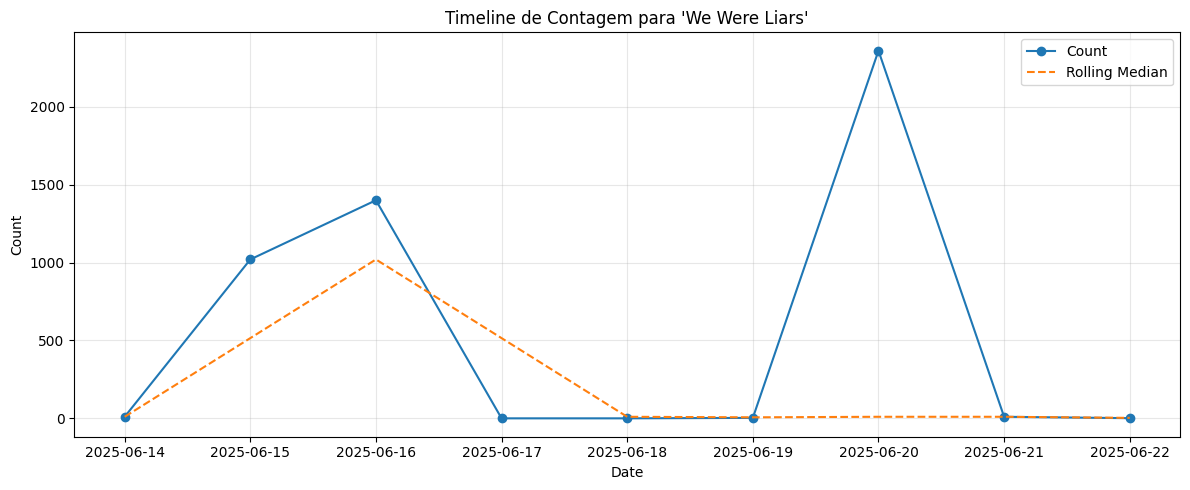

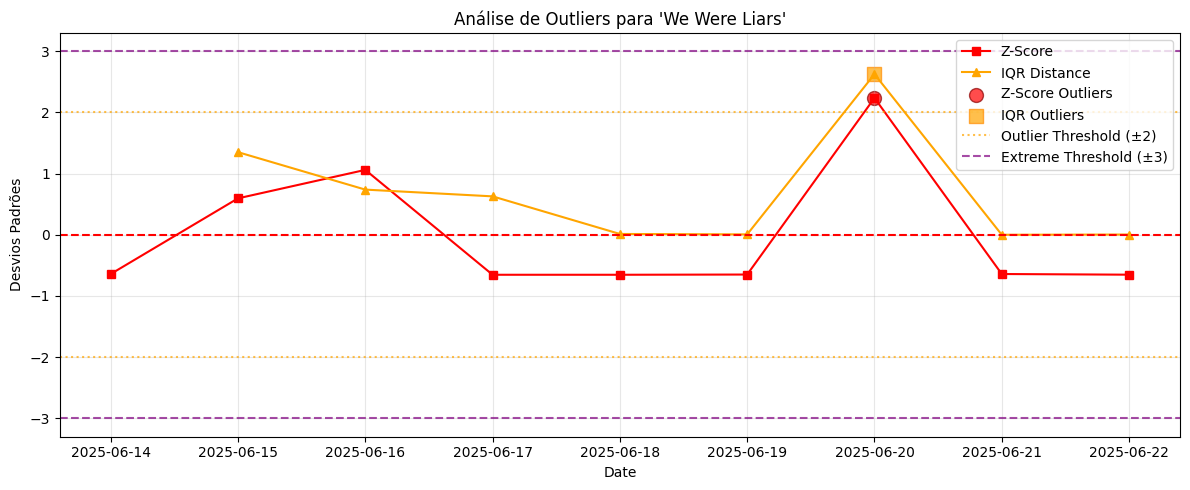

In [88]:
#✅ Entraram no ranking (1):
#   • We Were Liars (#6, global_rank_change: +220, top_rank: #6)

title = 'We Were Liars'
window_size = 7
full_outlier_analysis(df_googlenews_mentions, title , window_size)


Como podemos ver em 20/06/25 a quantidade de notícias sobre o "We Were Liars" foi considerada outlier em relação à média do período para o título tanto no índice z-score quanto na distância interquartial (IQR), ou seja, a quantidade nesse dia superou 2 desvios-padrão a média no período no Z-Score e superou 2 distâncias interquartis no IQR. 


Como podemos observar o We Were Liars entrou no ranking top 10 em 22/06/25 e subiu 220 posições no ranking global, o que é compatível com o aumento de notícias no dia 20 visto anteriomente na análise de outliers.

Agora vamos analisar o MobLand que saiu do ranking.


,date,count,title,type,z_score,rolling_q25,rolling_q75,rolling_iqr,rolling_median,iqr_distance,z_outlier,iqr_outlier,extreme_outlier
105,2025-06-14,2,MobLand,tv-shows,2.5,2.00,2.00,0.00,2.0,NaN,True,False,False
106,2025-06-15,1,MobLand,tv-shows,1.0,1.25,1.75,0.50,1.5,1.35,False,False,False
107,2025-06-16,0,MobLand,tv-shows,-0.5,0.50,1.50,1.00,1.0,1.35,False,False,False
108,2025-06-17,0,MobLand,tv-shows,-0.5,0.00,1.25,1.25,0.5,0.54,False,False,False
109,2025-06-18,0,MobLand,tv-shows,-0.5,0.00,1.00,1.00,0.0,0.00,False,False,False
110,2025-06-19,0,MobLand,tv-shows,-0.5,0.00,0.75,0.75,0.0,0.00,False,False,False
111,2025-06-20,0,MobLand,tv-shows,-0.5,0.00,0.50,0.50,0.0,0.00,False,False,False
191,2025-06-21,0,MobLand,tv-shows,-0.5,0.00,0.00,0.00,0.0,NaN,False,False,False
192,2025-06-22,0,MobLand,tv-shows,-0.5,0.00,0.00,0.00,0.0,NaN,False,False,False


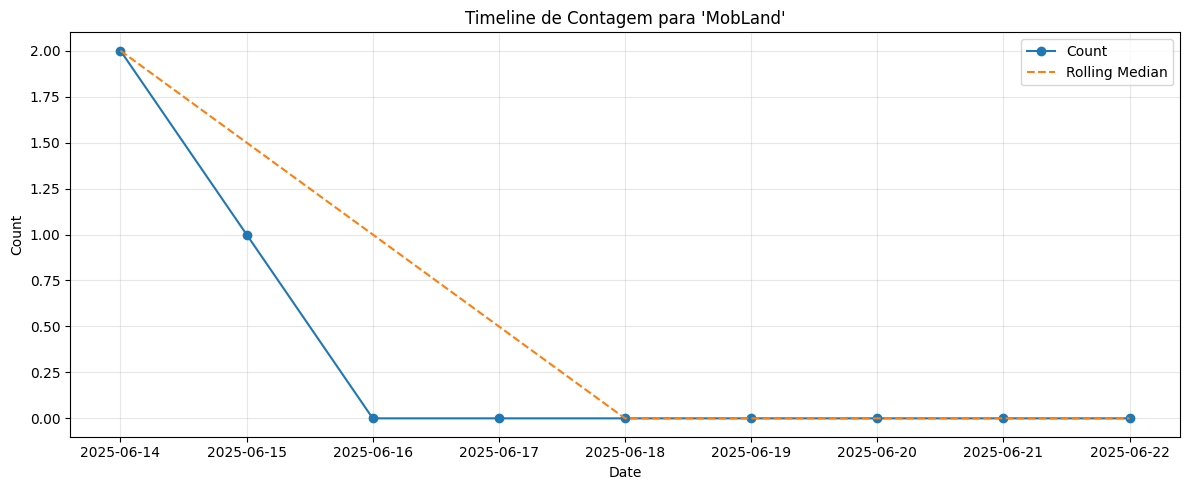

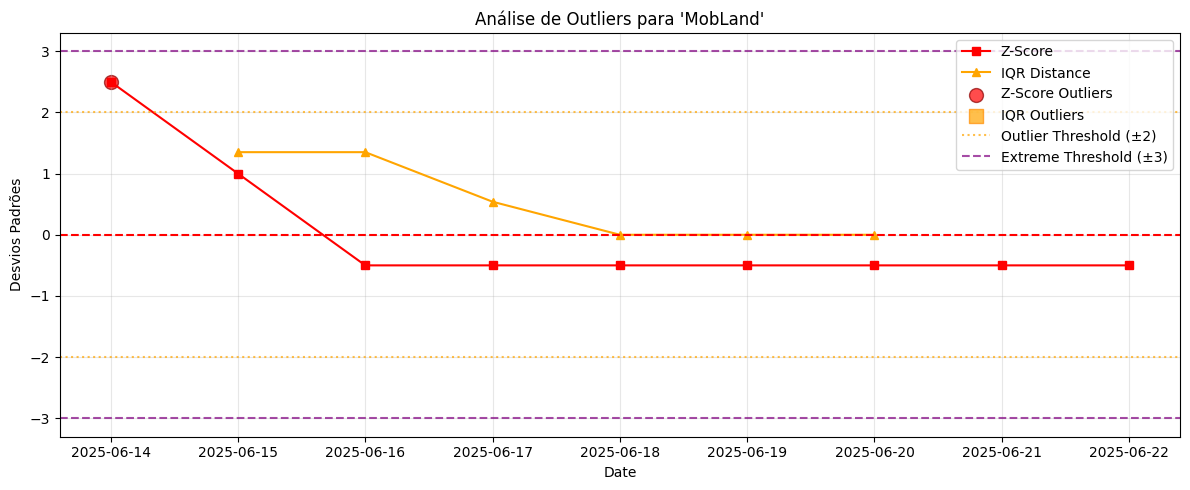

In [84]:
#❌ Saíram do ranking (1):
#   • MobLand (era #10)

title = 'MobLand'
window_size = 7
full_outlier_analysis(df_googlenews_mentions, title , window_size)
#_ = analyze_changes(df_shows_first_date, df_shows_last_date, "TV Shows")


Mobland não atingiu foi considerado um outlier, mas pela contagem absoluta de notícias que já estava baixa, caiu para zero no dia 16, o que pode indicar alguma correlação. Temos uma queda exata de 3 desvios-padrão no z-score (de 2.5 para -0.5), o que nos leva a analisar não só o indicativo de outlier em relação à média/mediana (z-score e iqr) no período, mas sim a variação do índices z-score e iqr ao longo dos dias. Vamos seguir analisando, agora vamos analisar Andor, que caiu uma posição da 6ª para a 7ª e caiu uma posição no ranking global (#6 → #7 (global_rank_change: -1, top_rank: #1)). É uma mudança mais sútil, mas vamos verificar se existe algum indicativo na análise das notícias. 

,date,count,title,type,z_score,rolling_q25,rolling_q75,rolling_iqr,rolling_median,iqr_distance,z_outlier,iqr_outlier,extreme_outlier
84,2025-06-14,2,Andor,tv-shows,-0.894427,2.00,2.00,0.00,2.0,NaN,False,False,False
85,2025-06-15,3,Andor,tv-shows,-0.223607,2.25,2.75,0.50,2.5,1.35,False,False,False
86,2025-06-16,2,Andor,tv-shows,-0.894427,2.00,2.50,0.50,2.0,0.00,False,False,False
87,2025-06-17,2,Andor,tv-shows,-0.894427,2.00,2.25,0.25,2.0,0.00,False,False,False
88,2025-06-18,6,Andor,tv-shows,1.788854,2.00,3.00,1.00,2.0,5.40,False,True,True
89,2025-06-19,5,Andor,tv-shows,1.118034,2.00,4.50,2.50,2.5,1.35,False,False,False
90,2025-06-20,3,Andor,tv-shows,-0.223607,2.00,4.00,2.00,3.0,0.00,False,False,False
185,2025-06-21,5,Andor,tv-shows,1.118034,2.50,5.00,2.50,3.0,1.08,False,False,False
186,2025-06-22,2,Andor,tv-shows,-0.894427,2.00,5.00,3.00,3.0,0.45,False,False,False


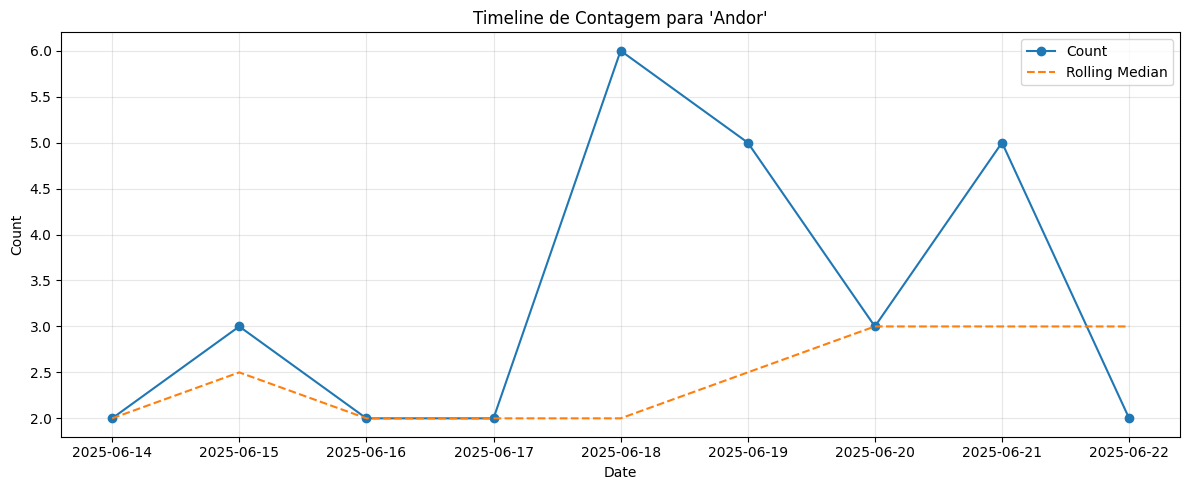

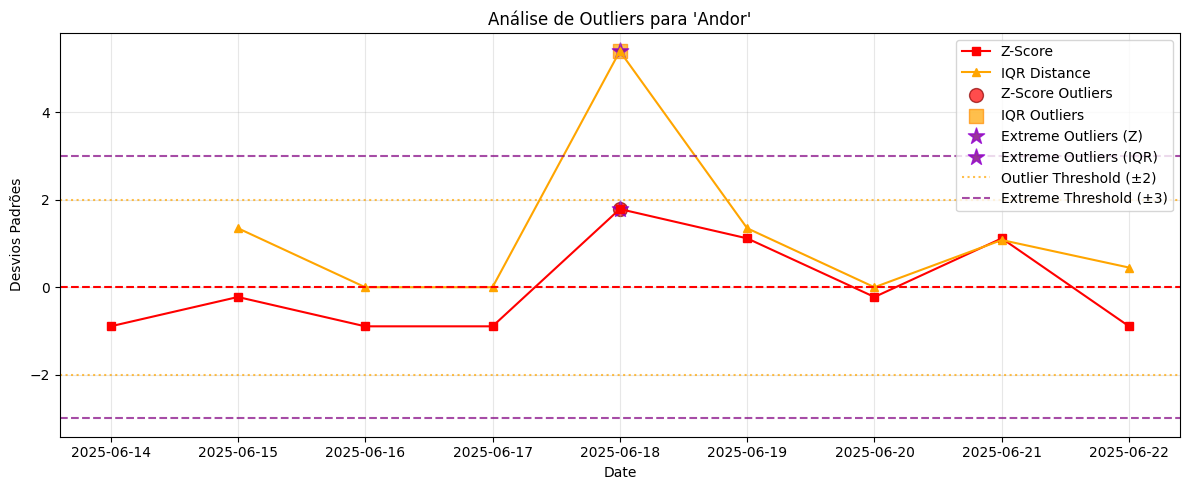

In [85]:
title = 'Andor'
window_size = 7
full_outlier_analysis(df_googlenews_mentions, title , window_size)
#_ = analyze_changes(df_shows_first_date, df_shows_last_date, "TV Shows")


Dia 18 ele foi considerado um outlier extremo (>3 distâncias IQRs), mas depois teve um recuou significativo (em distância interquartil) no dia 19 e depois no dia 20, conforme os valores IQR: 5.4 (18/06), 1.35 (19/06) e 0.0 (20/06).

Vamos analisar Dept. Q que manteve a posição. (#1) (global_rank_change: 0, top_rank: #1)

,date,count,title,type,z_score,rolling_q25,rolling_q75,rolling_iqr,rolling_median,iqr_distance,z_outlier,iqr_outlier,extreme_outlier
91,2025-06-14,7,Dept. Q,tv-shows,-0.347474,7.00,7.00,0.00,7.0,NaN,False,False,False
92,2025-06-15,4,Dept. Q,tv-shows,-0.353309,4.75,6.25,1.50,5.5,1.350000,False,False,False
93,2025-06-16,1640,Dept. Q,tv-shows,2.828415,5.50,823.50,818.00,7.0,2.695049,True,True,False
94,2025-06-17,5,Dept. Q,tv-shows,-0.351364,4.75,415.25,410.50,6.0,0.003289,False,False,False
95,2025-06-18,3,Dept. Q,tv-shows,-0.355254,4.00,7.00,3.00,5.0,0.900000,False,False,False
96,2025-06-19,5,Dept. Q,tv-shows,-0.351364,4.25,6.50,2.25,5.0,0.000000,False,False,False
97,2025-06-20,3,Dept. Q,tv-shows,-0.355254,3.50,6.00,2.50,5.0,1.080000,False,False,False
187,2025-06-21,2,Dept. Q,tv-shows,-0.357198,3.00,5.00,2.00,4.0,1.350000,False,False,False
188,2025-06-22,2,Dept. Q,tv-shows,-0.357198,2.50,5.00,2.50,3.0,0.540000,False,False,False


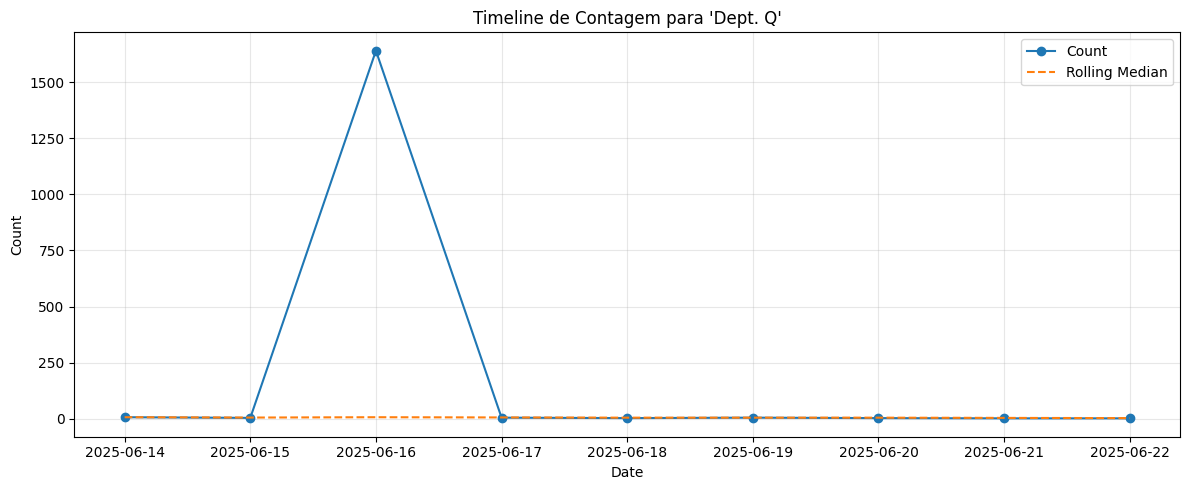

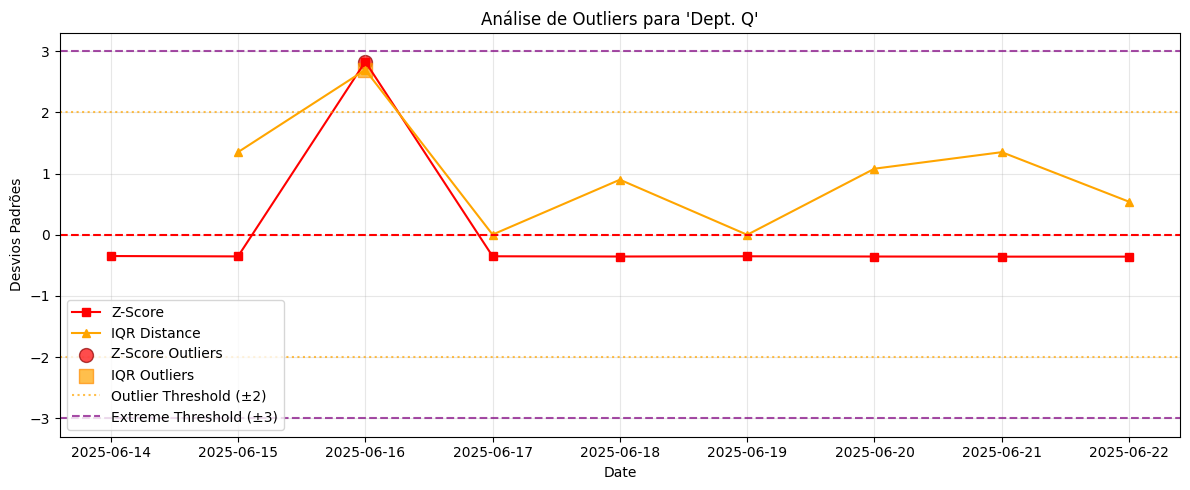

In [89]:
# Vamos analisar Dept. Q que manteve a posição. (#1) (global_rank_change: 0, top_rank: #1)
title = 'Dept. Q'
window_size = 7
full_outlier_analysis(df_googlenews_mentions, title , window_size)  
# Vamos analisar The Bear que manteve a posição. (#2) (global_rank_change: 0, top_rank: #2)


Dept. Q teve um salto alto de quantidade de notícias  em 16/06 e depois estabilizou. Como temos apenas o ranking de 21 e 22, pois não é possível obter a série histórica dos ranking do JustWatch, não conseguimos verificar qual situação dele no dia e nos dias seguintes a esse aumento. Como antes de 21 e 22 a quantidade de notícias se manteve estável, acreditamos que também existe alguma correlação para esse caso.

### Conclusão

Aparentemente existe uma correlação entre a quantidade de notícias publicadas sobre um título e a sua posição no ranking do JustWatch, pois para os títulos analisados, a quantidade de notícias publicadas sobre eles em dias imediatamente anteriores ao do ranking parece influenciar sua posição no ranking do JustWatch.

É claro que é cedo para afirmar isso com certeza, pois analisamos apenas alguns títulos e não temos uma série histórica dos rankings do JustWatch, mas os dados parecem indicar que existe alguma correlação entre a quantidade de notícias publicadas sobre um título e sua posição no ranking do JustWatch.


Estudos futuros deveriam se concentrar em :

- Obter mais rankings diários do JustWatch, já que o site não oferece essa opção e faz-se necessário coletar os dados diariamente para ter uma série histórica mais robusta.

- Analisar mais títulos para verificar se a correlação se mantém, ou seja, se a quantidade de notícias publicadas sobre um título influencia sua posição no ranking do JustWatch.

- Buscar encontrar uma fórmula/heurística que relacione a quantidade de notícias publicadas sobre um título e sua posição no ranking do JustWatch, para tentar prever a posição de um título no ranking do JustWatch com base na quantidade de notícias publicadas sobre ele.

- Buscar encontrar um modelo de machine learning que relacione a quantidade de notícias publicadas sobre um título e sua posição no ranking do JustWatch, para tentar prever a posição de um título no ranking do JustWatch com base na quantidade de notícias publicadas sobre ele.

- Enriquecer os dados com outras variáveis, como por exemplo, a quantidade de visualizações do título em plataformas de streaming, a quantidade de comentários nas redes sociais, etc., para tentar encontrar uma correlação mais robusta entre essas variáveis e a posição no ranking do JustWatch.


A análise dos dados feita até o momento é encorajadora e indica ser possível identificar alguma métrica simples para previsão de movimentação no ranking diário do JustWatch, mas ainda é preliminar e necessita de mais dados e análises para se chegar a conclusões mais robustas.


